## Generating and Exploring Data

In [22]:
from random import choices, seed

In [23]:
numberofrolls=1800
seed(9)
dice1 = choices([1,2,3,4,5,6], k=numberofrolls)
dice2 = choices([1,2,3,4,5,6], k=numberofrolls)

In [24]:
print(dice1[0:10])

[3, 3, 1, 6, 1, 4, 6, 1, 4, 4]


In [25]:
dicesum = [dice1[n]+dice2[n] for n in range(numberofrolls)]

In [26]:
import matplotlib.pyplot as plt
import numpy as np 

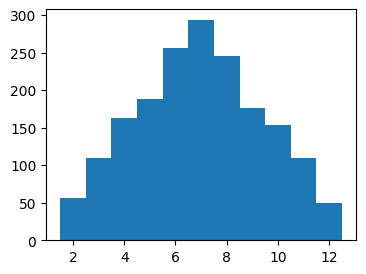

In [27]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(dicesum, bins = [2,3,4,5,6,7,8,9,10,11,12,13], align="left")
plt.show()

In [28]:
def getcenter(allpoints):
    center=np.mean(allpoints)
    stdev=np.sqrt(np.cov(allpoints))
    return(center, stdev)
print(getcenter(dicesum))

(6.9511111111111115, 2.4682190929301053)


In [29]:
import scipy.stats as stats
import math

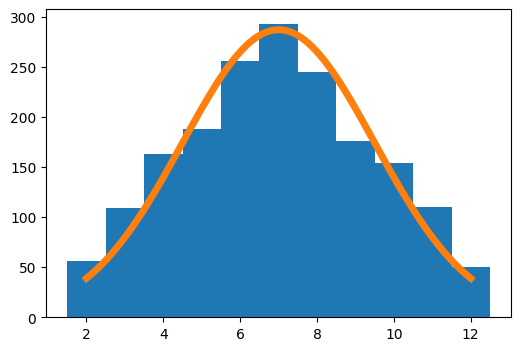

In [30]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(dicesum, bins=range(2,14), align="left")
mu=7
sigma=2.5
x=np.linspace(mu-2*sigma, mu+2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x,mu,sigma)*numberofrolls, linewidth=5)
plt.show()

In [31]:
# calculate the number of rolls out of 1800 would result in a 2
stats.norm.pdf(2, mu, sigma)*numberofrolls

38.8734958894954

In [32]:
# calculate the number of rolls out of 1800 would result in a 7
stats.norm.pdf(7, mu, sigma)* numberofrolls

287.23844188903155

In [33]:
# calculate the number of rolls out of 1800 would result in a 12
stats.norm.pdf(12, mu, sigma)* numberofrolls

38.8734958894954

## using another kind of die

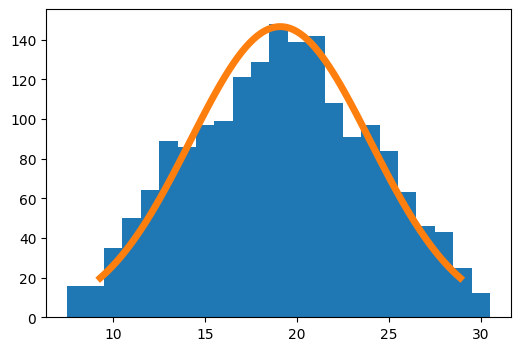

In [34]:
seed(913)
dice1=choices([4,5,6,7,8,9,10,11,12,13,14,15], k=numberofrolls)
dice2=choices([4,5,6,7,8,9,10,11,12,13,14,15], k=numberofrolls)
dicesum12 = [dice1[n]+dice2[n] for n in range(numberofrolls)]
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(dicesum12, bins=range(8,32), align="left")
mu=np.mean(dicesum12)
sigma=np.std(dicesum12)
x=np.linspace(mu-2*sigma, mu+2*sigma,100)*1
plt.plot(x, stats.norm.pdf(x,mu,sigma)*numberofrolls, linewidth=5)
plt.show()

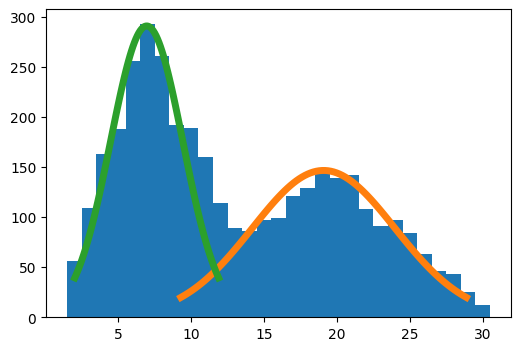

In [37]:
dicesumboth=dicesum+dicesum12
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(dicesumboth,bins=range(2,32),align="left")
mu=np.mean(dicesum12)
sigma=np.std(dicesum12)
x=np.linspace(mu-2*sigma, mu+2*sigma,100)*1
plt.plot(x, stats.norm.pdf(x,mu,sigma)*numberofrolls, linewidth=5)
mu=np.mean(dicesum)
sigma=np.std(dicesum)
x=np.linspace(mu-2*sigma, mu+2*sigma,100)*1
plt.plot(x, stats.norm.pdf(x,mu,sigma)*numberofrolls, linewidth=5)
plt.show()

## The Origin of Observations with Clustering

In [39]:
seed(494)
randomselection=choices(dicesumboth, k=1)
print(randomselection)

[12]


In [40]:
stats.norm.pdf(8, np.mean(dicesum), np.std(dicesum))*numberofrolls

265.87855493973007

In [41]:
stats.norm.pdf(8, np.mean(dicesum12), np.std(dicesum12))*numberofrolls

11.289203035758725

In [42]:
stats.norm.pdf(12, np.mean(dicesum), np.std(dicesum))*numberofrolls

35.87586208537935

In [43]:
stats.norm.pdf(12, np.mean(dicesum12), np.std(dicesum12))*numberofrolls

51.42993240324318

In [45]:
from scipy.stats import multivariate_normal

In [53]:
# classification model based on 2 sets of possible dice rolls types
def classify(allpts, allmns, allvar):
    vars=[]
    for n in range(len(allmns)):
        vars.append(multivariate_normal(mean=allmns[n], cov=allvar[n]))
    classification=[]
    for point in allpts:
        this_classification=-1
        this_pdf=0
        for n in range(len(allmns)):
            if vars[n].pdf(point)>this_pdf:
                this_pdf=vars[n].pdf(point)
                this_classification=n+1
        classification.append(this_classification)
    return classification

In [54]:
allpoints = [2,8,12,15,25]
allmeans = [7,19]
allvar = [np.cov(dicesum),np.cov(dicesum12)]
print(classify(allpoints,allmeans,allvar))

[1, 1, 2, 2, 2]


## E-M Clustering

In [55]:
import ast
import requests

In [57]:
link = "https://bradfordtuckfield.com/emdata.txt"
f = requests.get(link)
allpoints = ast.literal_eval(f.text)

In [59]:
allpoints[:4]

[(-0.1552675464942554, -0.09969103286971781),
 (-0.43451816054370895, -0.2843645740995829),
 (-0.3014078398152444, 0.17346914107296707),
 (-0.30301227549315163, -0.0565929491122545)]

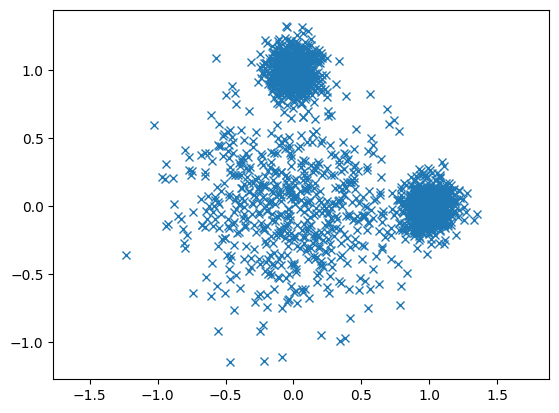

In [60]:
allxs = [point[0] for point in allpoints]
allys = [point[1] for point in allpoints]
plt.plot(allxs, allys, 'x')
plt.axis('equal')
plt.show()

## The Guessing Step

In [65]:
#initial guesses
mean1=[-1,0]
mean2=[0.5,-1]
mean3=[0.5,0.5]

allmeans=[mean1,mean2,mean3]

cov1=[[1,0],[0,1]]
cov2=[[1,0],[0,1]]
cov3=[[1,0],[0,1]]

allvar=[cov1,cov2,cov3]


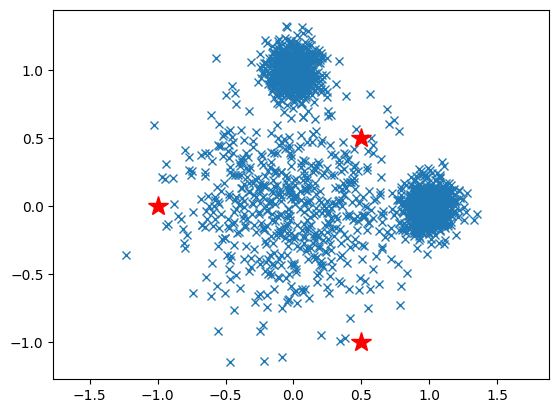

In [66]:
plt.plot(allxs, allys, 'x')
plt.plot(mean1[0],mean1[1],'r*', markersize=15)
plt.plot(mean2[0],mean2[1],'r*', markersize=15)
plt.plot(mean3[0],mean3[1],'r*', markersize=15)
plt.axis('equal')
plt.show()

## The Expectation Step

In [ ]:
# classification model
def classify(allpts, allmns, allvar):
    vars=[]
    for n in range(len(allmns)):
        vars.append(multivariate_normal(mean=allmns[n], cov=allvar[n]))
    classification=[]
    for point in allpts:
        this_classification=-1
        this_pdf=0
        for n in range(len(allmns)):
            if vars[n].pdf(point)>this_pdf:
                this_pdf=vars[n].pdf(point)
                this_classification=n+1
        classification.append(this_classification)
    return classification

In [67]:
theclass = classify(allpoints, allmeans, allvar)

In [68]:
theclass[:10]

[1, 1, 1, 1, 3, 1, 3, 3, 1, 3]

In [69]:
def makeplot(allpoints,theclass,allmeans):
    thecolors=['black']*len(allpoints)
    for idx in range(len(thecolors)):
        if theclass[idx]==2:
            thecolors[idx]='green'
        if theclass[idx]==3:
            thecolors[idx]='yellow'
    allxs=[point[0] for point in allpoints]
    allys=[point[1] for point in allpoints]
    for i in range(len(allpoints)):
        plt.scatter(allxs[i], allys[i], color=thecolors[i])
    for i in range(len(allmeans)):
        plt.plot(allmeans[i][0], allmeans[i][1], 'b*', markersize=15)
    plt.axis('equal')
    plt.show()

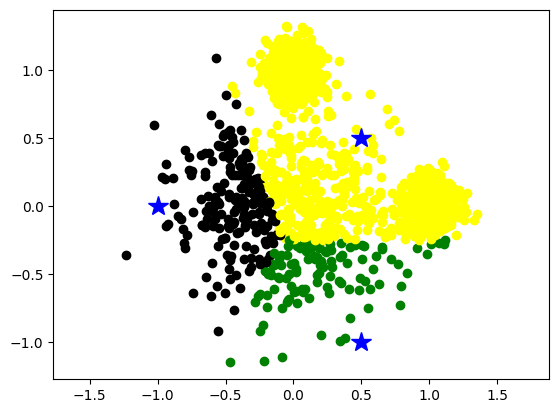

In [70]:
makeplot(allpoints, theclass, allmeans)

## Maximization step

In [73]:
def getcenters(allpoints, theclass, k):
    centers=[]
    thevars=[]
    for n in range(k):
        pointsn=[allpoints[i] for i in range(0,len(allpoints)) if theclass[i]==(n+1)]
        xpointsn=[points[0] for points in pointsn]
        ypointsn = [points[1] for points in pointsn]
        xcenter=np.mean(xpointsn)
        ycenter=np.mean(ypointsn)
        centers.append([xcenter,ycenter])
        thevars.append(np.cov(xpointsn,ypointsn))
    return centers, thevars

In [75]:
allmeans,allvar = getcenters(allpoints,theclass,3)

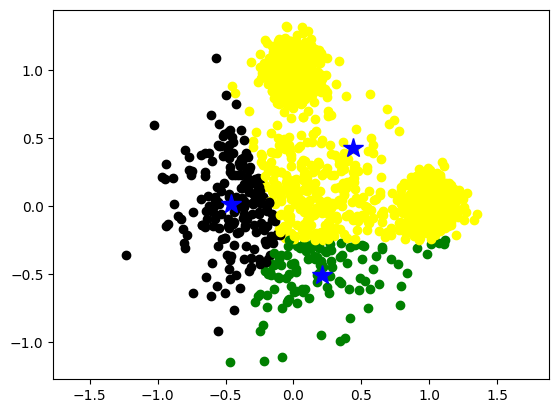

In [77]:
makeplot(allpoints,theclass,allmeans)

## The Convergence Step

In [78]:
for n in range(0,100):
    theclass=classify(allpoints,allmeans,allvar)
    allmeans,allvar=getcenters(allpoints,theclass,3)

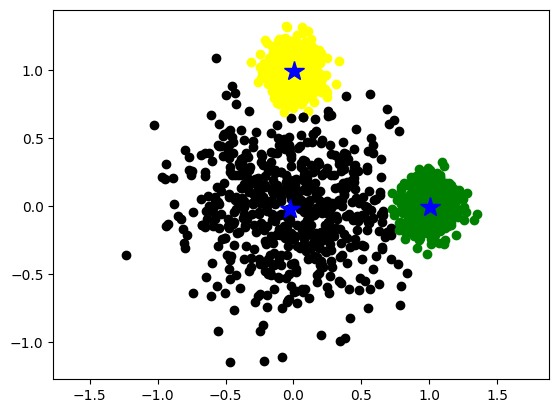

In [79]:
makeplot(allpoints,theclass,allmeans)

## Other Clustering Methods

### K-Means Clustering

In [80]:
from sklearn.cluster import KMeans

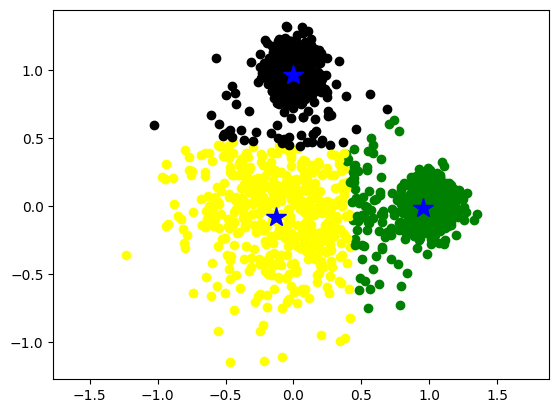

In [82]:
# Create a Kmeans cluster and plot the clusters along with the cluster centers
kmeans = KMeans(init="random", n_clusters=3, max_iter=300, random_state=42)
kmeans.fit(allpoints)
newclass=[label+1 for label in kmeans.labels_]
makeplot(allpoints,newclass,kmeans.cluster_centers_)